In [53]:
import numpy as np

import jax
import jax.numpy as jnp

# -------------- helper libraries -------------- #
import sys
import os
import time
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import importlib

def append_path(path):
    if path not in sys.path:
        sys.path.append(path)
        
append_path(os.path.abspath(os.path.join('..', '00_utils')))
append_path(os.path.abspath(os.path.join('..', '00_utils_training')))
append_path(os.path.abspath(os.path.join('..', '00_models')))
    
import logging
logging.basicConfig(level=logging.ERROR, filename='error_log.txt')

import run_train_toy
importlib.reload(run_train_toy)
Trainer = run_train_toy.TrainerToy

import analyse_results
reload_module = analyse_results.reload_module

Graphs = reload_module('analyse_results', 'Graphs')
Results = reload_module('analyse_results', 'Results')

In [77]:
params_model = {
    'layer_widths': [2, 32, 2],
    'penalty_lambda_reg': 1e-5,
    'time_invariant': True,
    'learning_rate': 1e-3,
    'max_iter': [400, 750],
    'pretrain': [0.2, 1],
    'log': 5,
    'split_time': False,
    'rtol': 1e-3,
    'atol': 1e-6,
}

In [78]:
results = {}
for data in ['ho', 'vdp', 'do']:
    if data == 'do':
        params_model['layer_widths'] = [3, 32, 2]
        params_model['time_invariant'] = False
    Trainer = reload_module('run_train_toy', 'TrainerToy')
    trainer = Trainer.load_trainer(data, spacing_type="uniform", model_type = "pytorch")
    trainer.train(params_model)
    results[data] = trainer.extract_results_pytorch()
    results[data]['train_loss'] = trainer.losses

Epoch 0, Training Loss: 1.053300142288208
Epoch 100, Training Loss: 0.044652462005615234
Epoch 200, Training Loss: 0.03446409851312637
Epoch 300, Training Loss: 0.031981296837329865
Epoch 0, Training Loss: 1.5468988418579102
Epoch 100, Training Loss: 0.0724848210811615
Epoch 200, Training Loss: 0.05278302729129791
Epoch 300, Training Loss: 0.044094234704971313
Epoch 400, Training Loss: 0.040012817829847336
Epoch 500, Training Loss: 0.03806091845035553
Epoch 600, Training Loss: 0.037110235542058945
Epoch 700, Training Loss: 0.03664176166057587
Epoch 0, Training Loss: 2.212161064147949
Epoch 100, Training Loss: 0.3400608003139496
Epoch 200, Training Loss: 0.19578737020492554
Epoch 300, Training Loss: 0.11034748703241348
Epoch 0, Training Loss: 9.168540954589844
Epoch 100, Training Loss: 0.5258094072341919
Epoch 200, Training Loss: 0.5081523656845093
Epoch 300, Training Loss: 0.4941600561141968
Epoch 400, Training Loss: 0.48148781061172485
Epoch 500, Training Loss: 0.4697079360485077
Epoc

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2 and 3x32)

In [75]:
len(results['ho']['train_loss'][1])

2

In [74]:
reload = True
if reload:
    formatted_time = time.strftime('%Y-%m-%d_%H-%M-%S')
    filename = f'results/pytorch_training_conv_all_new.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(results, file)
        
    print(f"Results saved to {filename}")

Results saved to results/pytorch_training_conv_all_new.pkl


/Users/mariiashapo/Library/CloudStorage/OneDrive-Personal/project_2324/NODE/00_utils_training/run_train_toy.py:389: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.t_test = torch.tensor(self.t_test, dtype=torch.float32)
/Users/mariiashapo/Library/CloudStorage/OneDrive-Personal/project_2324/NODE/00_utils_training/run_train_toy.py:390: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.init_state_test = torch.tensor(self.init_state_test, dtype=torch.float32)


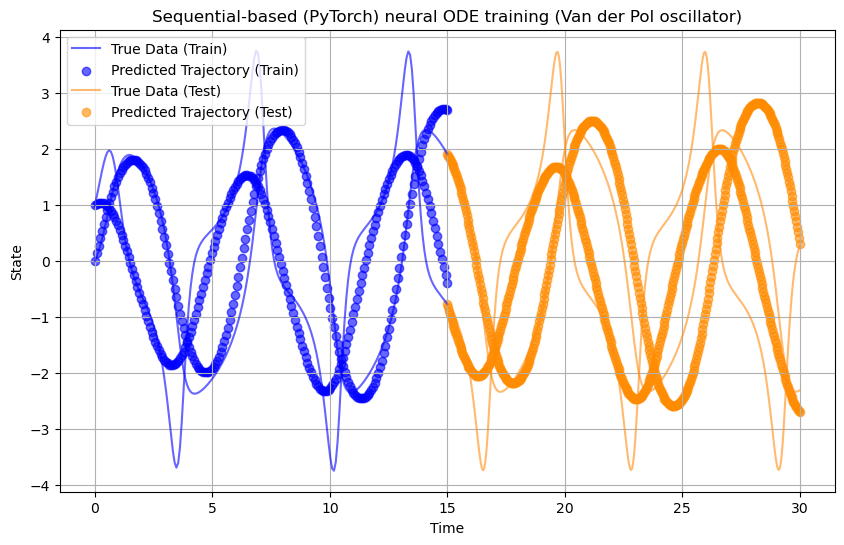

In [128]:
detailed_result = trainer.extract_results_pytorch(detailed = True)
y_pred = detailed_result['odeint_pred']
y_pred_test = detailed_result['odeint_pred_test']

plt.figure(figsize=(10, 6))

plt.plot(trainer.t, trainer.y[:,0], color = 'blue', label='True Data (Train)', alpha = 0.6)
plt.plot(trainer.t, trainer.y[:,1], color = 'blue', alpha = 0.6)
plt.scatter(trainer.t, y_pred[:,0], color = 'blue', label='Predicted Trajectory (Train)', alpha = 0.6)
plt.scatter(trainer.t, y_pred[:,1], color = 'blue', alpha = 0.6)

plt.plot(trainer.t_test, trainer.y_test[:,0], color='#FF8C10', label='True Data (Test)', alpha = 0.6)
plt.plot(trainer.t_test, trainer.y_test[:,1], color='#FF8C10', alpha = 0.6)
plt.scatter(trainer.t_test, y_pred_test[:,0], color='#FF8C00', label='Predicted Trajectory (Test)', alpha = 0.6)
plt.scatter(trainer.t_test, y_pred_test[:,1], color='#FF8C00', alpha = 0.6)

plt.title(f"Sequential-based (PyTorch) neural ODE training (Van der Pol oscillator)")
plt.xlabel("Time")
plt.ylabel("State")
plt.legend(loc ="upper left")
plt.grid(True)
plt.show()

In [58]:
params_model['split_time'] = False
params_model['log'] = 5
Trainer = reload_module('run_train_toy', 'TrainerToy')
trainer = Trainer.load_trainer("vdp", spacing_type="uniform", model_type = "pytorch")
trainer.train(params_model)

Epoch 0, Training Loss: 2.212161064147949
Epoch 100, Training Loss: 0.3400608003139496
Epoch 200, Training Loss: 0.19578737020492554
Epoch 300, Training Loss: 0.11034748703241348
Epoch 0, Training Loss: 9.168540954589844
Epoch 100, Training Loss: 0.5258094072341919
Epoch 200, Training Loss: 0.5081523656845093
Epoch 300, Training Loss: 0.4941600561141968


KeyboardInterrupt: 

In [130]:
results = trainer.extract_results_pytorch()
results['train_loss'] = trainer.losses

In [1]:
results_time
reload = True
if reload:
    formatted_time = time.strftime('%Y-%m-%d_%H-%M-%S')
    filename = f'results/pytorch_training_conv_vdp_new.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(results, file)
        
    print(f"Results saved to {filename}")

NameError: name 'results_time' is not defined

## Initialize with collocation-base model

In [132]:
import pickle
import torch
import numpy as np

# load the results
with open('../00_trained_wb/trained_wb_32.pkl', 'rb') as f:
    trained_wb = pickle.load(f)

In [133]:
def prepare_custom_weights(data_dict):
    """
    Extracts and prepares custom weights and biases from the provided dictionary,
    ensuring compatibility with PyTorch by converting from JAX arrays if necessary.
    
    Args:
    data_dict (dict): Dictionary containing layer parameters.
    
    Returns:
    list of tuples: Each tuple contains (weights, biases) tensors for a layer.
    """
    custom_weights = []
    
    for key, params in data_dict.items():
        if 'Dense' in key:
            kernel = params['kernel']
            bias = params['bias']
            
            # Check if kernel and bias are JAX arrays, convert to numpy if true
            if hasattr(kernel, 'block_until_ready'):
                kernel = np.array(kernel)
            if hasattr(bias, 'block_until_ready'):
                bias = np.array(bias)
            
            custom_weights.append((kernel.T, bias.T))
    
    return custom_weights

trained_wb_pytorch = prepare_custom_weights(trained_wb)

In [152]:
params_model = {
    'layer_widths': [2, 32, 2],
    'penalty_lambda_reg': 1e-5,
    'time_invariant': True,
    'learning_rate': 1e-3,
    'max_iter': 500,
    'pretrain': False,
    'log': False,
    'split_time': True,
    'rtol': 1e-3,
    'atol': 1e-6,
    'learning_rate': 1e-5
}

Trainer = reload_module('run_train_toy', 'TrainerToy')
trainer = Trainer.load_trainer("vdp", spacing_type="uniform", model_type = "pytorch")
trainer.train(params_model, trained_wb_pytorch)

Epoch 0, Training Loss: 0.040282782167196274
Epoch 100, Training Loss: 0.03447034955024719
Epoch 200, Training Loss: 0.021662432700395584
Epoch 300, Training Loss: 0.02102039009332657
Epoch 400, Training Loss: 0.020879223942756653


In [153]:
results_time_pyomo = trainer.extract_results_pytorch()
results_time
reload = True
if reload:
    formatted_time = time.strftime('%Y-%m-%d_%H-%M-%S')
    filename = f'results/pytorch_training_conv_vdp_time_pyomo_new.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(results_time_pyomo, file)
        
    print(f"Results saved to {filename}")

Results saved to results/pytorch_training_conv_vdp_time_pyomo_new.pkl


In [154]:
params_model = {
    'layer_widths': [2, 32, 2],
    'penalty_lambda_reg': 1e-5,
    'time_invariant': True,
    'learning_rate': 1e-3,
    'max_iter': 500,
    'pretrain': False,
    'log': 25,
    'split_time': False,
    'rtol': 1e-3,
    'atol': 1e-6,
    'learning_rate': 1e-5
}

Trainer = reload_module('run_train_toy', 'TrainerToy')
trainer = Trainer.load_trainer("vdp", spacing_type="uniform", model_type = "pytorch")
trainer.train(params_model, trained_wb_pytorch)

Epoch 0, Training Loss: 0.040282782167196274
Epoch 100, Training Loss: 0.03447034955024719
Epoch 200, Training Loss: 0.021662432700395584
Epoch 300, Training Loss: 0.02102039009332657
Epoch 400, Training Loss: 0.020879223942756653


In [155]:
results_pyomo = trainer.extract_results_pytorch()
results_pyomo['train_loss'] = trainer.losses

reload = True
if reload:
    formatted_time = time.strftime('%Y-%m-%d_%H-%M-%S')
    filename = f'results/pytorch_training_conv_vdp_pyomo_new.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(results_pyomo, file)
        
    print(f"Results saved to {filename}")

Results saved to results/pytorch_training_conv_vdp_pyomo_new.pkl
